<a href="https://colab.research.google.com/github/rtrochepy/astronomer/blob/main/best_model_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Configuración para ignorar advertencias y mostrar todas las columnas
pd.options.mode.chained_assignment = None  # Para evitar advertencias de configuración encadenada
pd.set_option('display.max_columns', None)

# Cargar el archivo CSV en un DataFrame
try:
    df = pd.read_csv("test_data.csv")
    print("Archivo cargado correctamente.")
except FileNotFoundError:
    print("Error: Archivo no encontrado. Verifica el nombre y la ruta del archivo.")
    exit()

# Mostrar una vista previa de los datos
print("Vista previa del DataFrame:")
print(df.head())

# Calcular y mostrar el número de valores nulos por columna
nulos_por_columna = df.isnull().sum()
nulos_detectados = nulos_por_columna[nulos_por_columna > 0]

if not nulos_detectados.empty:
    print("\nColumnas con valores nulos:")
    print(nulos_detectados)
else:
    print("\nNo se detectaron valores nulos en las columnas.")

# Establecer el umbral para filtrar columnas con demasiados nulos
umbral = 0.5 * df.shape[0]
print(f"\nEl umbral de eliminación se estableció en: {umbral} valores no nulos.")

# Eliminar columnas con más del 50% de valores nulos
columnas_iniciales = df.shape[1]
df = df.dropna(thresh=umbral, axis=1)
columnas_eliminadas = columnas_iniciales - df.shape[1]

print(f"\nSe eliminaron {columnas_eliminadas} columnas con más del 50% de valores nulos.")

# Mostrar información final del DataFrame
print("\nInformación del DataFrame resultante:")
print(df.info())


Archivo cargado correctamente.
Vista previa del DataFrame:
                                                  ID Expenditure_AHF  \
0  3333333702723732807074333342320276353770732523...      2017-03-15   
1  3333333702723732807074333342320276353770732523...      2017-04-13   
2  3333333702723732807074333342320276353770732523...      2017-06-03   
3  3333333702723732807074333342320276353770732523...      2017-06-19   
4  3333333702723732807074333342320276353770732523...      2017-07-22   

   Payment_6804  Infraction_CGP  Base_7744  Base_80863  Risk_1930  \
0      0.938469        0.001733   0.008724    1.006838   0.009228   
1      0.936665        0.005775   0.004923    1.000653   0.006151   
2      0.954180        0.091505   0.021655    1.009672   0.006815   
3      0.960384        0.002455   0.013683    1.002700   0.001373   
4      0.947248        0.002483   0.015193    1.000727   0.007605   

   Expenditure_JIG  Infraction_SNZ  Base_02683  Infraction_SBF  \
0         0.124035        0

In [2]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer  # Necesario para IterativeImputer
from sklearn.impute import IterativeImputer

# Definir las columnas no numéricas
no_numerical = [
    'ID', 'Expenditure_AHF', 'Infraction_YFSG', 'Infraction_DQLY', 'Infraction_CLH',
    'Base_67254', 'Infraction_TEN', 'Base_8730', 'Base_23737', 'Infraction_NMCB',
    'Infraction_ZRH', 'Infraction_WIS', 'Infraction_WMAQ', 'label'
]

# Seleccionar solo las columnas numéricas
numerical_columns = [col for col in df.columns if col not in no_numerical]

# Verificar que las columnas numéricas existan
if not numerical_columns:
    print("No se encontraron columnas numéricas en el DataFrame.")
    exit()

# Calcular el porcentaje de valores nulos en cada columna numérica
porcentaje_null = df[numerical_columns].isnull().mean() * 100

# Agrupar columnas en función del porcentaje de valores nulos
low_null_columns = porcentaje_null[porcentaje_null < 10].index
mid_null_columns = porcentaje_null[(porcentaje_null >= 10) & (porcentaje_null < 30)].index
high_null_columns = porcentaje_null[porcentaje_null >= 30].index

# Mostrar estadísticas sobre los valores nulos
print(f"Columnas con menos del 10% de nulos: {len(low_null_columns)}")
print(f"Columnas con entre el 10% y el 30% de nulos: {len(mid_null_columns)}")
print(f"Columnas con más del 30% de nulos: {len(high_null_columns)}")

# Tratamiento de valores nulos
try:
    # Menos del 10% de nulos - rellenar con la media
    if not low_null_columns.empty:
        df[low_null_columns] = df[low_null_columns].fillna(df[low_null_columns].mean())

    # Entre 10% y 30% de nulos - rellenar con la mediana
    if not mid_null_columns.empty:
        df[mid_null_columns] = df[mid_null_columns].fillna(df[mid_null_columns].median())

    # Más del 30% de nulos - usar Iterative Imputer
    if not high_null_columns.empty:
        imputer = IterativeImputer()
        df[high_null_columns] = imputer.fit_transform(df[high_null_columns])
        print("Iterative Imputer aplicado exitosamente a las columnas con más del 30% de nulos.")
except Exception as e:
    print(f"Error en el tratamiento de valores nulos: {e}")

# Verificar el resultado final
print("\nResumen del DataFrame después del tratamiento de nulos:")
print(df.info())

Columnas con menos del 10% de nulos: 138
Columnas con entre el 10% y el 30% de nulos: 8
Columnas con más del 30% de nulos: 1
Iterative Imputer aplicado exitosamente a las columnas con más del 30% de nulos.

Resumen del DataFrame después del tratamiento de nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Columns: 160 entries, ID to Infraction_DNOU
dtypes: float64(152), int64(1), object(7)
memory usage: 2.2+ MB
None


In [3]:
# Lista de variables categóricas
categoricas = [
    'Infraction_YFSG', 'Infraction_DQLY', 'Infraction_CLH', 'Base_67254',
    'Infraction_TEN', 'Base_8730', 'Base_23737', 'Infraction_NMCB',
    'Infraction_ZRH', 'Infraction_WIS', 'Infraction_WMAQ'
]

# Mostrar las categorías únicas de cada variable categórica
print("\nCategorías únicas por columna categórica (antes de rellenar valores faltantes):")
for col in categoricas:
    if col in df.columns:
        categorias_unicas = df[col].unique()
        print(f"{col}: {categorias_unicas}")
    else:
        print(f"{col}: La columna no existe en el DataFrame.")

# Rellenar los valores faltantes con 'Missing'
df[categoricas] = df[categoricas].fillna('Missing')

# Verificar que los valores faltantes se hayan rellenado
print("\nCategorías únicas por columna categórica (después de rellenar valores faltantes):")
for col in categoricas:
    if col in df.columns:
        categorias_unicas = df[col].unique()
        print(f"{col}: {categorias_unicas}")
    else:
        print(f"{col}: La columna no existe en el DataFrame.")


Categorías únicas por columna categórica (antes de rellenar valores faltantes):
Infraction_YFSG: ['CR' 'CO' 'CL' 'XL']
Infraction_DQLY: ['O' 'R' nan 'U' '-1']
Infraction_CLH: ['very_high' nan 'moderate_low' 'moderate' 'high' 'moderate_high' 'low'
 'very_low']
Base_67254: ['moderate_low' 'low' 'high' 'moderate' 'moderate_high' 'very_high'
 'extremely_high' nan]
Infraction_TEN: ['moderate_high' 'extremely_low' nan 'moderate_low' 'very_high' 'moderate'
 'high' 'low']
Base_8730: [0. 2. 1.]
Base_23737: [1 0]
Infraction_NMCB: [ 1.  0. nan]
Infraction_ZRH: [ 0. nan]
Infraction_WIS: [ 0. nan  1.]
Infraction_WMAQ: [ 1. nan  0. -1.]

Categorías únicas por columna categórica (después de rellenar valores faltantes):
Infraction_YFSG: ['CR' 'CO' 'CL' 'XL']
Infraction_DQLY: ['O' 'R' 'Missing' 'U' '-1']
Infraction_CLH: ['very_high' 'Missing' 'moderate_low' 'moderate' 'high' 'moderate_high'
 'low' 'very_low']
Base_67254: ['moderate_low' 'low' 'high' 'moderate' 'moderate_high' 'very_high'
 'extremely_h

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Convertir todas las columnas categóricas a tipo 'category' en pandas
df[categoricas] = df[categoricas].astype('category')

# Función para aplicar binning a columnas con un orden implícito, manteniendo la categoría 'Missing'
def binarize_levels_with_missing(value):
    if value == 'Missing':
        return 'Missing'
    elif value in ['very_low', 'low', 'moderate_low', 'extremely_low']:
        return 'low'
    elif value in ['moderate', 'moderate_high']:
        return 'moderate'
    else:
        return 'high'

# Aplicar binning en las columnas que tienen orden implícito
ordered_columns = ['Infraction_CLH', 'Base_67254', 'Infraction_TEN']
for col in ordered_columns:
    if col in df.columns:
        df[col] = df[col].apply(binarize_levels_with_missing)

# Aplicar One-Hot Encoding a columnas con categorías, incluyendo 'Missing'
one_hot_columns = ['Infraction_CLH', 'Base_67254', 'Infraction_TEN', 'Infraction_YFSG', 'Infraction_DQLY']
df = pd.get_dummies(df, columns=one_hot_columns, drop_first=False)

# Aplicar One-Hot Encoding a columnas numéricas con pocos valores distintos
numeric_one_hot_columns = ['Base_8730', 'Infraction_WMAQ']
df = pd.get_dummies(df, columns=numeric_one_hot_columns, drop_first=False)

# Manejamos columnas binarias asegurando compatibilidad de tipos antes de aplicar Label Encoding
binary_columns = ['Base_23737', 'Infraction_NMCB', 'Infraction_ZRH', 'Infraction_WIS']
for col in binary_columns:
    if col in df.columns:
        # Convertir a string para asegurar consistencia de tipo
        df[col] = df[col].astype(str)

# Aplicar Label Encoding a columnas binarias después de la conversión de tipo
le = LabelEncoder()
for col in binary_columns:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# Verificar el resultado final
print("\nResumen del DataFrame después de la transformación:")
print(df.info())



Resumen del DataFrame después de la transformación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1767 entries, 0 to 1766
Columns: 181 entries, ID to Infraction_WMAQ_Missing
dtypes: bool(28), float64(147), int64(4), object(2)
memory usage: 2.1+ MB
None


In [5]:
import pandas as pd

# Convertir la columna 'Expenditure_AHF' a tipo datetime, manejando posibles errores
try:
    df['Expenditure_AHF'] = pd.to_datetime(df['Expenditure_AHF'], errors='coerce')
    print("La columna 'Expenditure_AHF' se ha convertido a formato datetime.")
except Exception as e:
    print(f"Error al convertir la columna 'Expenditure_AHF' a datetime: {e}")

# Establecer la columna 'ID' como índice, asegurando que exista en el DataFrame
if 'ID' in df.columns:
    df = df.set_index('ID')
    print("La columna 'ID' se ha establecido como índice del DataFrame.")
else:
    print("Error: La columna 'ID' no existe en el DataFrame.")

# Mostrar el DataFrame para verificar los cambios
print("\nVista previa del DataFrame con la columna 'ID' como índice:")
print(df.head())

# Verificar la presencia de valores nulos en el DataFrame
nulos_por_columna_2 = df.isnull().sum()
columnas_con_nulos = nulos_por_columna_2[nulos_por_columna_2 > 0]

if columnas_con_nulos.empty:
    print("\nNo hay valores nulos en el DataFrame.")
else:
    print("\nColumnas con valores nulos detectadas:")
    print(columnas_con_nulos)

La columna 'Expenditure_AHF' se ha convertido a formato datetime.
La columna 'ID' se ha establecido como índice del DataFrame.

Vista previa del DataFrame con la columna 'ID' como índice:
                                                   Expenditure_AHF  \
ID                                                                   
33333337027237328070743333423202763537707325232...      2017-03-15   
33333337027237328070743333423202763537707325232...      2017-04-13   
33333337027237328070743333423202763537707325232...      2017-06-03   
33333337027237328070743333423202763537707325232...      2017-06-19   
33333337027237328070743333423202763537707325232...      2017-07-22   

                                                    Payment_6804  \
ID                                                                 
33333337027237328070743333423202763537707325232...      0.938469   
33333337027237328070743333423202763537707325232...      0.936665   
33333337027237328070743333423202763537707325232..

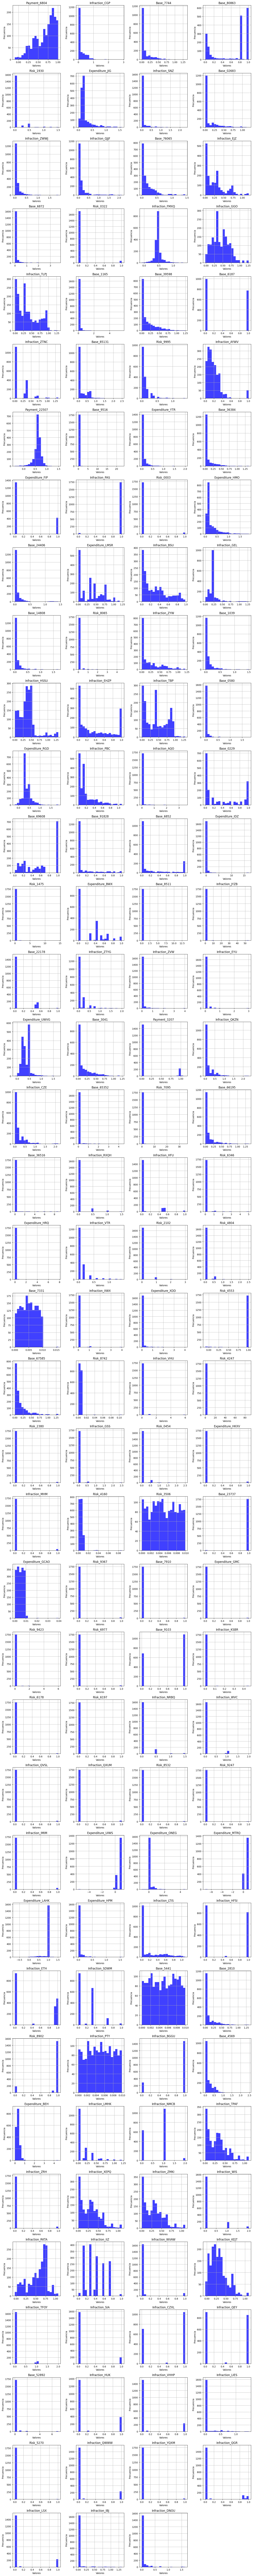

In [6]:
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['number']).columns  # Más genérico para incluir cualquier tipo numérico

if numeric_columns.empty:
    print("No se encontraron columnas numéricas en el DataFrame.")
else:
    # Configuración de la cuadrícula para los histogramas
    num_cols = 4  # Número de columnas en el grid
    num_rows = -(-len(numeric_columns) // num_cols)  # Calcular filas necesarias (redondeo hacia arriba)

    # Crear los subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    axes = axes.flatten()  # Aplanar el arreglo de ejes para iterar fácilmente

    for i, col in enumerate(numeric_columns):
        ax = axes[i]
        df[col].hist(ax=ax, bins=20, alpha=0.75, color='blue')
        ax.set_title(col)
        ax.set_xlabel("Valores")
        ax.set_ylabel("Frecuencia")

    # Eliminar subplots vacíos si el número de columnas no es múltiplo de `num_cols`
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()  # Ajustar los subplots para evitar superposición
    plt.show()

In [7]:
# Número total de filas
total_rows = len(df)

# Calcular el porcentaje de outliers en cada columna
outliers_percentage = (outliers_count / total_rows) * 100

# Mostrar el porcentaje de outliers por columna
print("Porcentaje de outliers por columna (IQR):")
print(outliers_percentage)

# Filtrar las columnas con menos del 5% de outliers
minor_outlier_columns = outliers_percentage[outliers_percentage < 5].index

# Eliminar filas con outliers en las columnas seleccionadas
for col in minor_outlier_columns:
    # Calcular los límites superior e inferior para los valores no outliers
    lower_limit = Q1[col] - 1.5 * IQR[col]
    upper_limit = Q3[col] + 1.5 * IQR[col]

    # Filtrar el DataFrame para mantener solo los valores dentro de los límites
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

# Mostrar información después de eliminar los outliers
print("\nDataFrame después de eliminar outliers en columnas con menos del 5%:")
print(df.info())

NameError: name 'outliers_count' is not defined

In [ ]:
import numpy as np

# Filtrar las columnas con entre 5% y 15% de outliers
moderate_outlier_columns = outliers_percentage[(outliers_percentage >= 5) & (outliers_percentage <= 15)].index

# Reemplazar los outliers con los límites de IQR en las columnas seleccionadas
for col in moderate_outlier_columns:
    # Calcular los límites inferior y superior basados en IQR
    lower_limit = Q1[col] - 1.5 * IQR[col]
    upper_limit = Q3[col] + 1.5 * IQR[col]

    # Reemplazar los valores fuera de los límites usando np.clip
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

# Confirmar los cambios
print(f"\nSe reemplazaron los outliers en las siguientes columnas: {list(moderate_outlier_columns)}")
print("\nResumen del DataFrame después del reemplazo de outliers:")
print(df.info())

In [ ]:
from scipy.stats import skew
import numpy as np

# Filtrar las columnas con más del 15% de outliers
high_outlier_columns = outliers_percentage[outliers_percentage > 15].index

# Analizar y recomendar transformaciones basadas en skewness
for col in high_outlier_columns:
    # Calcular skewness para diferentes transformaciones
    original_skew = skew(df[col].dropna())
    log_skew = skew(np.log1p(df[col].clip(lower=0).dropna()))  # Aseguramos valores no negativos
    sqrt_skew = skew(np.sqrt(df[col].clip(lower=0).dropna()))

    # Mostrar resultados
    print(f'\nColumna: {col}')
    print(f'  Skew original: {original_skew:.4f}')
    print(f'  Skew logaritmo: {log_skew:.4f}')
    print(f'  Skew raíz cuadrada: {sqrt_skew:.4f}')

    # Determinar transformación recomendada
    if abs(log_skew) < abs(sqrt_skew):
        print(f'  Transformación recomendada: Logaritmo (log1p)')
    else:
        print(f'  Transformación recomendada: Raíz Cuadrada (sqrt)')

# Opcional: Aplicar transformaciones automáticamente
# Puedes descomentar las siguientes líneas para aplicar automáticamente las transformaciones
# basadas en la recomendación:

for col in high_outlier_columns:
    log_skew = skew(np.log1p(df[col].clip(lower=0).dropna()))
    sqrt_skew = skew(np.sqrt(df[col].clip(lower=0).dropna()))
    if abs(log_skew) < abs(sqrt_skew):
        df[col] = np.log1p(df[col].clip(lower=0))  # Aplicar logaritmo
    else:
        df[col] = np.sqrt(df[col].clip(lower=0))  # Aplicar raíz cuadrada

In [ ]:
import numpy as np

# Diccionario para organizar las columnas según su transformación
transformations = {
    "sqrt": [
        'Risk_1930', 'Infraction_SNZ', 'Infraction_QJJF', 'Infraction_FMXQ',
        'Expenditure_FIP', 'Base_0580', 'Base_91828', 'Expenditure_IDZ',
        'Base_22178', 'Infraction_ZVW', 'Infraction_JBR', 'Expenditure_UIWS',
        'Expenditure_MTRQ', 'Expenditure_HPM', 'Infraction_HUK', 'Infraction_QWWW',
        'Infraction_QGR', 'Infraction_LSX', 'Infraction_DNOU'
    ],
    "log": ['Infraction_BGGU']
}

# Aplicar transformaciones según el diccionario
for transform, cols in transformations.items():
    for col in cols:
        if col in df.columns:  # Verificar que la columna existe en el DataFrame
            if transform == "sqrt":
                df[col] = np.sqrt(df[col].clip(lower=0))  # Raíz cuadrada con clip para evitar valores negativos
            elif transform == "log":
                df[col] = np.log1p(df[col].clip(lower=0))  # Logaritmo con log1p para manejar ceros
            else:
                print(f"Transformación desconocida: {transform} en columna {col}")
        else:
            print(f"Advertencia: La columna '{col}' no existe en el DataFrame.")

# Verificar tipos de datos después de las transformaciones
print("\nTipos de datos del DataFrame después de las transformaciones:")
print(df.dtypes)

In [ ]:
# Verificar valores únicos en las columnas
columns_to_check = ['Base_23737', 'Infraction_NMCB', 'Infraction_ZRH', 'Infraction_WIS']
for col in columns_to_check:
    if col in df.columns:
        print(f"Valores únicos en {col}: {df[col].unique()}")

# Convertir columnas categóricas con valores int a categoría
categorical_int_columns = ['Infraction_NMCB', 'Infraction_ZRH', 'Infraction_WIS']
for col in categorical_int_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')
    else:
        print(f"Advertencia: La columna '{col}' no existe en el DataFrame.")

# Convertir columnas booleanas a enteros
boolean_columns = df.select_dtypes(include=['bool']).columns
if not boolean_columns.empty:
    df[boolean_columns] = df[boolean_columns].astype(int)

# Eliminar columnas constantes si existen
columns_to_drop = ['Expenditure_AHF', 'Base_23737']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
if existing_columns_to_drop:
    df = df.drop(columns=existing_columns_to_drop)
    print(f"Columnas eliminadas: {existing_columns_to_drop}")
else:
    print("No se encontraron columnas constantes para eliminar.")

# Mostrar tipos de datos después de las transformaciones
print("\nTipos de datos del DataFrame después de las transformaciones:")
print(df.dtypes)

# Verificar valores nulos por columna
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

In [ ]:
# Verificar si todas las columnas de rfe_columns existen en el DataFrame
missing_columns = [col for col in rfe_columns if col not in df.columns]
if missing_columns:
    print(f"Advertencia: Las siguientes columnas no existen en el DataFrame y serán omitidas: {missing_columns}")

# Crear un DataFrame con las columnas disponibles en rfe_columns
existing_rfe_columns = [col for col in rfe_columns if col in df.columns]
df_rfe = df[existing_rfe_columns].copy()

# Mostrar una vista previa del DataFrame resultante
print("\nVista previa del DataFrame con columnas RFE:")
print(df_rfe.head())

# Guardar el DataFrame procesado en un archivo CSV
output_file = 'processed_dataset.csv'
df_rfe.to_csv(output_file, index=False)
print(f"\nEl DataFrame procesado se ha guardado correctamente en: {output_file}")

In [ ]:
import joblib
import pandas as pd

# Cargar el scaler y el modelo desde los archivos guardados
try:
    scaler = joblib.load("scaler.joblib")
    knn_model = joblib.load("knn_model.joblib")
    print("Scaler y modelo k-NN cargados correctamente.")
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Verificar que el DataFrame `df_rfe` no esté vacío
if df_rfe.empty:
    print("Error: El DataFrame `df_rfe` está vacío. Verifica los datos.")
    exit()

# Separar características excluyendo la columna 'label' si existe
X_rfe = df_rfe.drop(columns=['label'], errors='ignore')

# Verificar si todas las columnas requeridas están presentes en `X_rfe`
if X_rfe.isnull().values.any():
    print("Advertencia: Se encontraron valores nulos en las características. Considera imputarlos antes de continuar.")

# Escalar los datos usando el scaler cargado
try:
    X_rfe_scaled = scaler.transform(X_rfe)
    print("Datos escalados correctamente.")
except Exception as e:
    print(f"Error durante el escalado de datos: {e}")
    exit()

# Realizar predicciones con el modelo k-NN
try:
    predictions = knn_model.predict(X_rfe_scaled)
    print("Predicciones realizadas correctamente.")
except Exception as e:
    print(f"Error durante la predicción: {e}")
    exit()

# Agregar las predicciones como nueva columna 'label' al DataFrame original
df_rfe['label'] = predictions

# Mostrar una vista previa del DataFrame con las predicciones
print("\nVista previa del DataFrame con las predicciones añadidas:")
print(df_rfe.head())


In [ ]:
# Verificar el conteo de valores en la columna 'label'
if 'label' in df_rfe.columns:
    label_counts = df_rfe['label'].value_counts()
    print("Conteo de valores en la columna 'label':")
    print(label_counts)
else:
    print("Advertencia: La columna 'label' no existe en el DataFrame.")

# Reiniciar el índice del DataFrame
df_rfe = df_rfe.reset_index(drop=True)

# Crear un DataFrame final con solo las columnas 'ID' y 'label'
if 'ID' in df_rfe.columns and 'label' in df_rfe.columns:
    df_rfe_final = df_rfe[['ID', 'label']].copy()
    print("\nVista previa del DataFrame final:")
    print(df_rfe_final.head())
else:
    missing_columns = [col for col in ['ID', 'label'] if col not in df_rfe.columns]
    print(f"Error: Las siguientes columnas faltan en el DataFrame: {missing_columns}")
    exit()

# Guardar el DataFrame final en un archivo CSV
output_file = 'test_labels.csv'
try:
    df_rfe_final.to_csv(output_file, index=False)
    print(f"\nEl DataFrame final se ha guardado correctamente en: {output_file}")
except Exception as e:
    print(f"Error al guardar el archivo CSV: {e}")